In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

import os
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import random

Mounted at /content/gdrive


In [ ]:
PATH = '/content/gdrive/My Drive/data/'
IMG_WIDTH   = 1024
IMG_HEIGHT  = 256

def load(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)
    
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))

    return image

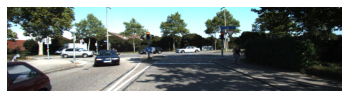

In [ ]:
image = load(PATH+'unet/kitti_train/000008_10.png')

# Show the image
plt.figure()
plt.axis('off')
plt.imshow(image/255.0)

In [ ]:
# normalizing the images to [-1, 1]
def normalize(image):
    image  = (image / 127.5) - 1

    return image

def random_jitter(image):
    if tf.random.uniform(()) > 0.5:
        # random mirroring
        image  = tf.image.flip_left_right(image)

    return image

def load_image_train(image_file):
    image = load(image_file)
    image = random_jitter(image)
    image = normalize(image)

    return image
    
def load_image_test(image_file):
    image = load(image_file)
    image = normalize(image)

    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


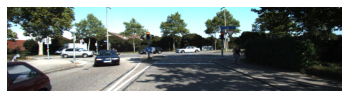

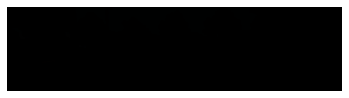

In [ ]:
image = load(PATH+'unet/kitti_train/000008_10.png')

# casting to int for matplotlib to show the image
plt.figure()
plt.axis('off')
plt.imshow(image/255.0)


image = load_image_train(PATH+'unet/kitti_train/000008_10.png')

# casting to int for matplotlib to show the image
plt.figure()
plt.axis('off')
plt.imshow(image/255.0)

In [ ]:
BUFFER_SIZE = 50
BATCH_SIZE  = 1

# train_dataset
train_dataset = tf.data.Dataset.list_files(PATH+'unet/kitti_train/*.png')
train_dataset = train_dataset.map(load_image_train, 
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(1)

# test_dataset
test_dataset = tf.data.Dataset.list_files(PATH+'unet/kitti_test/*.png')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(1)

In [ ]:
for img in train_dataset:
  print(img.shape)
  break

(1, 256, 1024, 3)


(1, 256, 1024, 3)


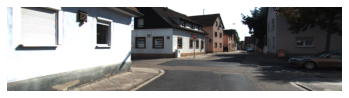

In [ ]:
for img in train_dataset.take(1):
  print(img.shape)
  plt.figure()
  plt.axis('off')
  plt.imshow(img[0]/255.0)